## Introduction
This notebook series propose a data preprocessing script to visualize the correlation between access to clean drinking water and life expectancy using data from accross the world.
The datasets used for this experiment were downloaded from WHO open data. [Learn more about WHO datasets](https://apps.who.int/gho/data/node.home) and how the rates are calculated.


### Step 1. Load the first dataset about drinking water access that was previously cleaned
Check what our datasets look like and so as to only keep the rows and columns we need

In [80]:
## Load 1st CSV file
import pandas as pd
import numpy as np
import scipy.stats as stats

url1 = 'my_data/new_drinking_water.csv'
drinking_water_df = pd.read_csv(url1, delimiter=',')
print(f"drinking_water_df type: {type(drinking_water_df)}")   ## drinking_water_df type: <class 'pandas.core.frame.DataFrame'>
print(f"drinking_water_df shape: {drinking_water_df.shape}")  ## drinking_water_df shape: (196,22)'

drinking_water_df type: <class 'pandas.core.frame.DataFrame'>
drinking_water_df shape: (196, 22)


In [81]:
## Check the details of the dataset 
drinking_water_df.info()

## DETAILS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  196 non-null    object 
 1   2020       182 non-null    float64
 2   2019       186 non-null    float64
 3   2018       187 non-null    float64
 4   2017       193 non-null    float64
 5   2016       195 non-null    float64
 6   2015       195 non-null    float64
 7   2014       195 non-null    float64
 8   2013       195 non-null    float64
 9   2012       195 non-null    float64
 10  2011       195 non-null    float64
 11  2010       194 non-null    float64
 12  2009       194 non-null    float64
 13  2008       194 non-null    float64
 14  2007       195 non-null    float64
 15  2006       195 non-null    float64
 16  2005       194 non-null    float64
 17  2004       192 non-null    float64
 18  2003       192 non-null    float64
 19  2002       192 non-null    float64
 20  2001      

In [82]:
## Check the fisrt rows of the dataset
drinking_water_df.head(8)

,Countries,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,75.0,72.0,70.0,67.0,64.0,61.0,59.0,56.0,53.0,...,46.0,43.0,41.0,38.0,36.0,34.0,32.0,30.0,28.0,28.0
1,Albania,95.0,95.0,94.0,94.0,94.0,93.0,93.0,93.0,92.0,...,91.0,90.0,90.0,90.0,89.0,89.0,88.0,87.0,87.0,87.0
2,Algeria,94.0,94.0,94.0,94.0,94.0,93.0,93.0,93.0,93.0,...,92.0,92.0,92.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,Angola,57.0,57.0,57.0,56.0,55.0,54.0,54.0,53.0,52.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0
5,Antigua and Barbuda,NaN,NaN,NaN,97.0,97.0,97.0,97.0,97.0,97.0,...,97.0,97.0,97.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
6,Argentina,NaN,NaN,NaN,NaN,99.0,99.0,99.0,99.0,99.0,...,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,96.0
7,Armenia,100.0,100.0,100.0,100.0,100.0,100.0,99.0,99.0,99.0,...,98.0,98.0,97.0,97.0,97.0,96.0,96.0,96.0,95.0,95.0


In [83]:
drinking_water_df.columns

Index(['Countries', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000'],
      dtype='object')

### Step 2 - Load and clean the second dataset about life expectancy around the world
The original data includes every country recognized by the WHO. [As defined by the WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3131) Life expectancy at birth reflects the overall mortality level of a population. It summarizes the mortality pattern that prevails across all age groups - children and adolescents, adults and the elderly.

In [84]:
## Load 2nd CSV file containing data for Region of the Americas

url2 = 'adult_mort_data/life_expectancy.csv'
life_expect_df = pd.read_csv(url2, delimiter=',')
print(f"life_expect_df type: {type(life_expect_df)}")   ## life_expect_df type: <class 'pandas.core.frame.DataFrame'>
print(f"life_expect_df shape: {life_expect_df.shape}")  ## life_expect_df shape: (733, 14)'

life_expect_df type: <class 'pandas.core.frame.DataFrame'>
life_expect_df shape: (733, 14)


In [85]:
## Check the details of the dataset 
life_expect_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Unnamed: 0                                          733 non-null    object
 1   Unnamed: 1                                          733 non-null    object
 2   Life expectancy at birth (years)                    733 non-null    object
 3   Life expectancy at birth (years).1                  733 non-null    object
 4   Life expectancy at birth (years).2                  733 non-null    object
 5   Life expectancy at age 60 (years)                   733 non-null    object
 6   Life expectancy at age 60 (years).1                 733 non-null    object
 7   Life expectancy at age 60 (years).2                 733 non-null    object
 8   Healthy life expectancy (HALE) at birth (years)     733 non-null    object
 9   Healthy li

In [86]:
## Check the fisrt rows of the dataset
life_expect_df.head(8)

,Unnamed: 0,Unnamed: 1,Life expectancy at birth (years),Life expectancy at birth (years).1,Life expectancy at birth (years).2,Life expectancy at age 60 (years),Life expectancy at age 60 (years).1,Life expectancy at age 60 (years).2,Healthy life expectancy (HALE) at birth (years),Healthy life expectancy (HALE) at birth (years).1,Healthy life expectancy (HALE) at birth (years).2,Healthy life expectancy (HALE) at age 60 (years),Healthy life expectancy (HALE) at age 60 (years).1,Healthy life expectancy (HALE) at age 60 (years).2
0,"Countries, territories and areas",Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
1,Afghanistan,2019,63.2,63.3,63.2,15.2,15.4,15.1,53.9,54.7,53.2,10.8,11.2,10.6
2,Afghanistan,2015,61.7,61.0,62.3,15.6,15.7,15.5,52.6,52.8,52.4,11.2,11.5,10.9
3,Afghanistan,2010,59.9,59.6,60.3,15.1,15.1,15.2,51.1,51.5,50.7,10.9,11.1,10.7
4,Afghanistan,2000,55.0,54.6,55.4,13.9,13.6,14.2,46.8,46.9,46.6,10.2,10.2,10.1
5,Albania,2019,78.0,76.3,79.9,21.0,20.2,21.9,69.1,68.0,70.3,16.6,15.9,17.3
6,Albania,2015,77.8,76.1,79.7,21.1,20.1,22.2,69.0,68.0,70.1,16.7,15.9,17.5
7,Albania,2010,76.2,74.2,78.3,21.3,19.9,22.6,67.6,66.3,68.9,16.7,15.7,17.7


In [87]:
# Rename the columns we will keep so that they can be more descriptive
old_column0 = 'Unnamed: 0'
new_column0 = 'Countries'
old_column1 = 'Unnamed: 1'
new_column1 = 'Year'
old_column2 = 'Life expectancy at birth (years)'
new_column2 = 'Life expectancy at birth in years'
old_column3 = 'Life expectancy at age 60 (years)'
new_column3 = 'Life expectancy at age 60 in years'
life_expect_df.rename(columns={old_column0: new_column0}, inplace=True)
life_expect_df.rename(columns={old_column1: new_column1}, inplace=True)
life_expect_df.rename(columns={old_column2: new_column2}, inplace=True)
life_expect_df.rename(columns={old_column3: new_column3}, inplace=True)

# Display the updated column names
print("\nUpdated column names:")
print(life_expect_df.columns)



Updated column names:
Index(['Countries', 'Year', 'Life expectancy at birth in years',
       'Life expectancy at birth (years).1',
       'Life expectancy at birth (years).2',
       'Life expectancy at age 60 in years',
       'Life expectancy at age 60 (years).1',
       'Life expectancy at age 60 (years).2',
       'Healthy life expectancy (HALE) at birth (years)',
       'Healthy life expectancy (HALE) at birth (years).1',
       'Healthy life expectancy (HALE) at birth (years).2',
       'Healthy life expectancy (HALE) at age 60 (years)',
       'Healthy life expectancy (HALE) at age 60 (years).1',
       'Healthy life expectancy (HALE) at age 60 (years).2'],
      dtype='object')


In [88]:
# Delete the first row by index, since it will be a repetition of column names
my_row_index = 0
life_expect_df = life_expect_df.drop(my_row_index)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(life_expect_df)


Updated DataFrame:
       Countries  Year Life expectancy at birth in years  \
1    Afghanistan  2019                              63.2   
2    Afghanistan  2015                              61.7   
3    Afghanistan  2010                              59.9   
4    Afghanistan  2000                              55.0   
5        Albania  2019                              78.0   
..           ...   ...                               ...   
728       Zambia  2000                              44.5   
729     Zimbabwe  2019                              60.7   
730     Zimbabwe  2015                              58.5   
731     Zimbabwe  2010                              51.5   
732     Zimbabwe  2000                              46.6   

    Life expectancy at birth (years).1 Life expectancy at birth (years).2  \
1                                 63.3                               63.2   
2                                 61.0                               62.3   
3                           

In [89]:
## Handpicking the columns we want to keep
## For each year, we want the 'Life expectancy at birth in years' and 'Life expectancy at age 60 in years', per country
our_columns = ['Countries', 'Year', 'Life expectancy at birth in years', 'Life expectancy at age 60 in years']
life_expect_df[our_columns]
## Dataframe shape change from [732 rows x 14 columns] to [732 rows x 4 columns]

,Countries,Year,Life expectancy at birth in years,Life expectancy at age 60 in years
1,Afghanistan,2019,63.2,15.2
2,Afghanistan,2015,61.7,15.6
3,Afghanistan,2010,59.9,15.1
4,Afghanistan,2000,55.0,13.9
5,Albania,2019,78.0,21.0
...,...,...,...,...
728,Zambia,2000,44.5,13.2
729,Zimbabwe,2019,60.7,15.6
730,Zimbabwe,2015,58.5,15.1
731,Zimbabwe,2010,51.5,14.1


In [90]:
## Since we need to pivot this dataset so it can have the same shape as the datset for drinking water,
## we'll saved one file with only the Life expectancy at birth in years and another with Life expectancy at age 60 in years

our_columns1 = ['Countries', 'Year', 'Life expectancy at birth in years']
life_expect_df[our_columns1]

,Countries,Year,Life expectancy at birth in years
1,Afghanistan,2019,63.2
2,Afghanistan,2015,61.7
3,Afghanistan,2010,59.9
4,Afghanistan,2000,55.0
5,Albania,2019,78.0
...,...,...,...
728,Zambia,2000,44.5
729,Zimbabwe,2019,60.7
730,Zimbabwe,2015,58.5
731,Zimbabwe,2010,51.5


In [91]:
## Pivot the life expectancy first DataFrame so it has the same shape as the drinking water usage Dataframe
life_expect_birth_df = life_expect_df[our_columns1]
# Pivot the DataFrame
life_expect_birth_df_pivot = life_expect_birth_df.pivot(index='Countries', columns='Year', values='Life expectancy at birth in years')
# Reset the index and rename the columns
life_expect_birth_df_pivot = life_expect_birth_df_pivot.reset_index().rename_axis(None, axis=1)

# Display the updated DataFrame
life_expect_birth_df_pivot.head(5)

,Countries,2000,2010,2015,2019
0,Afghanistan,55.0,59.9,61.7,63.2
1,Albania,73.5,76.2,77.8,78.0
2,Algeria,72.2,75.9,76.5,77.1
3,Angola,49.3,58.1,61.7,63.1
4,Antigua and Barbuda,74.6,75.9,76.1,76.5


In [92]:
# Save the DataFrame to a new CSV file
#life_expect_birth_df_pivot.to_csv('adult_mort_data/life_expect_birth.csv', index=False)

In [93]:
## For each year, we want the Life expectancy at age 60 in years, per country
our_columns2 = ['Countries', 'Year', 'Life expectancy at age 60 in years']
life_expect_df[our_columns2]

,Countries,Year,Life expectancy at age 60 in years
1,Afghanistan,2019,15.2
2,Afghanistan,2015,15.6
3,Afghanistan,2010,15.1
4,Afghanistan,2000,13.9
5,Albania,2019,21.0
...,...,...,...
728,Zambia,2000,13.2
729,Zimbabwe,2019,15.6
730,Zimbabwe,2015,15.1
731,Zimbabwe,2010,14.1


In [94]:
## Pivot the life expectancy second DataFrame so it has the same shape as the drinking water usage Dataframe
life_expect_sixty_df = life_expect_df[our_columns2]
# Pivot the DataFrame
life_expect_sixty_df_pivot = life_expect_sixty_df.pivot(index='Countries', columns='Year', values='Life expectancy at age 60 in years')
# Reset the index and rename the columns
life_expect_sixty_df_pivot = life_expect_sixty_df_pivot.reset_index().rename_axis(None, axis=1)

# Display the updated DataFrame
life_expect_sixty_df_pivot.head(5)

,Countries,2000,2010,2015,2019
0,Afghanistan,13.9,15.1,15.6,15.2
1,Albania,19.0,21.3,21.1,21.0
2,Algeria,19.8,21.4,21.8,22.0
3,Angola,14.4,16.0,16.7,17.0
4,Antigua and Barbuda,20.3,20.5,20.4,20.6


In [95]:
# Save the DataFrame to a new CSV file
#life_expect_sixty_df_pivot.to_csv('adult_mort_data/life_expect_sixty.csv', index=False)

### Working with the newly created files

In [96]:
# Load the newly created first table
file1 = 'adult_mort_data/life_expect_birth.csv'
life_expect_birth_df = pd.read_csv(file1, delimiter=',')

## Check the fisrt rows of the dataset
life_expect_birth_df.head(7)

,Countries,2000,2010,2015,2019
0,Afghanistan,55.0,59.9,61.7,63.2
1,Albania,73.5,76.2,77.8,78.0
2,Algeria,72.2,75.9,76.5,77.1
3,Angola,49.3,58.1,61.7,63.1
4,Antigua and Barbuda,74.6,75.9,76.1,76.5
5,Argentina,74.1,75.4,76.2,76.6
6,Armenia,71.9,73.1,74.5,76.0


In [97]:
# Load the newly created second table
file2 = 'adult_mort_data/life_expect_sixty.csv'
life_expect_sixty_df = pd.read_csv(file2, delimiter=',')

## Check the fisrt rows of the dataset
life_expect_sixty_df.head(7)

,Countries,2000,2010,2015,2019
0,Afghanistan,13.9,15.1,15.6,15.2
1,Albania,19.0,21.3,21.1,21.0
2,Algeria,19.8,21.4,21.8,22.0
3,Angola,14.4,16.0,16.7,17.0
4,Antigua and Barbuda,20.3,20.5,20.4,20.6
5,Argentina,20.2,20.6,21.0,21.1
6,Armenia,18.8,18.8,19.4,20.4


In [98]:
## Let's check if there are more rows (more countries entries) in the drinking water dataframe VS the life expectancy dataframes

# Get the list of countries in drinking_water_df but not in life_expect_birth_df
extra_countries1 = set(drinking_water_df['Countries']) - set(life_expect_birth_df['Countries'])

# Display the extra rows
print(extra_countries1)


{'Niue', 'San Marino', 'Anguilla', 'Saint Kitts and Nevis', 'Andorra', 'Monaco', 'Nauru', 'Cook Islands', 'occupied Palestinian territory, including east Jerusalem', 'Dominica', 'Marshall Islands', 'Palau', 'Tuvalu'}


In [99]:
# Get the list of countries in drinking_water_df but not in life_expect_sixty_df
extra_countries2 = set(drinking_water_df['Countries']) - set(life_expect_sixty_df['Countries'])

# Display the extra rows
print(extra_countries2)

{'Niue', 'San Marino', 'Anguilla', 'Saint Kitts and Nevis', 'Andorra', 'Monaco', 'Nauru', 'Cook Islands', 'occupied Palestinian territory, including east Jerusalem', 'Dominica', 'Marshall Islands', 'Palau', 'Tuvalu'}


In [100]:
# Filter drinking_water_df to remove the rows with extra countries
drinking_water_df = drinking_water_df[~drinking_water_df['Countries'].isin(extra_countries1)]

print(f" drinking_water_df shape: {drinking_water_df.shape}") ## df1 shape goes from [196, 22] to [183, 22] 

 drinking_water_df shape: (183, 22)


In [101]:
# Save the modified dataset to a new CSV file that will be used in the next steps
#drinking_water_df.to_csv('my_data/life_expect_drinking_water.csv', index=False)

### Step 3 -  Make sure the data is machine readable and replace missing values
We've saved our final datasets into new files.
We will now load them and make some transformations so they can be added to a ML model

In [102]:
## Load both CSV files and ensure they have the same number of rows and columns

url_drinking_water_df = 'my_data/life_expect_drinking_water.csv'
my_drinking_water_df = pd.read_csv(url_drinking_water_df, delimiter=',')

print(f"my_drinking_water_df type: {type(my_drinking_water_df)}")   ## my_drinking_water_df type: <class 'pandas.core.frame.DataFrame'>
print(f"my_drinking_water_df shape: {my_drinking_water_df.shape}")  ## my_drinking_water_df shape: (183, 18)

my_drinking_water_df type: <class 'pandas.core.frame.DataFrame'>
my_drinking_water_df shape: (183, 22)


In [103]:
## Check the details of the drinking water dataset
my_drinking_water_df.info()   ## We can see the type of the data entries is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  183 non-null    object 
 1   2020       172 non-null    float64
 2   2019       176 non-null    float64
 3   2018       177 non-null    float64
 4   2017       180 non-null    float64
 5   2016       182 non-null    float64
 6   2015       182 non-null    float64
 7   2014       182 non-null    float64
 8   2013       182 non-null    float64
 9   2012       182 non-null    float64
 10  2011       182 non-null    float64
 11  2010       181 non-null    float64
 12  2009       181 non-null    float64
 13  2008       181 non-null    float64
 14  2007       182 non-null    float64
 15  2006       182 non-null    float64
 16  2005       181 non-null    float64
 17  2004       179 non-null    float64
 18  2003       179 non-null    float64
 19  2002       179 non-null    float64
 20  2001      

In [104]:
## Check the details of the life_expect_birth dataset
life_expect_birth_df.info() ## We can see the type of the data entries is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  183 non-null    object 
 1   2000       183 non-null    float64
 2   2010       183 non-null    float64
 3   2015       183 non-null    float64
 4   2019       183 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.3+ KB


In [105]:
## Check the details of the life_expect_sixty dataset
life_expect_sixty_df.info() ## We can see the type of the data entries is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  183 non-null    object 
 1   2000       183 non-null    float64
 2   2010       183 non-null    float64
 3   2015       183 non-null    float64
 4   2019       183 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.3+ KB


In [106]:
# Count the total number of empty or NaN values in all 3 datasets
missing_values_my_drinking_water_df = my_drinking_water_df.isnull().sum().sum()
missing_values_life_expect_birth_df = life_expect_birth_df.isnull().sum().sum()
missing_values_life_expect_sixty_df = life_expect_sixty_df.isnull().sum().sum()

# Display the result
print("Total number of empty or NaN values in the 1st dataset:", missing_values_my_drinking_water_df) ## 67 missing values
print("Total number of empty or NaN values in the 2nd dataset:", missing_values_life_expect_birth_df) ## 0 missing values
print("Total number of empty or NaN values in the 3rd dataset:", missing_values_life_expect_sixty_df) ## 0 missing values

Total number of empty or NaN values in the 1st dataset: 67
Total number of empty or NaN values in the 2nd dataset: 0
Total number of empty or NaN values in the 3rd dataset: 0


In [107]:
# Replace missing values in the drinking water dataset with column means 
my_drinking_water_df= my_drinking_water_df.fillna(my_drinking_water_df.mean())
missing_values_my_drinking_water_df = my_drinking_water_df.isnull().sum().sum()

# Display the updated DataFrame. Result should be 0
print("Total number of empty or NaN values in the 1st dataset:", missing_values_my_drinking_water_df)

Total number of empty or NaN values in the 1st dataset: 0


C:\Users\esspe\AppData\Local\Temp\ipykernel_4652\2837836709.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_drinking_water_df= my_drinking_water_df.fillna(my_drinking_water_df.mean())


### Step 4 - Ensure the data is in a proper format in order to merge both datasets

In [108]:
## First, let's reoder the columns in drinking water dataset so they go from 2000 to 2020 and not the other way around

# Create a list of column names in the desired order
new_columns = ['Countries'] + [str(year) for year in range(2000, 2021)]

# Reorder the columns
my_drinking_water_df = my_drinking_water_df.reindex(columns=new_columns)

# Display the modified DataFrame
my_drinking_water_df.head(4)

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,...,51.0,53.0,56.0,59.0,61.0,64.0,67.0,70.0,72.0,75.0
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,...,92.0,92.0,93.0,93.0,93.0,94.0,94.0,94.0,95.0,95.0
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,...,93.0,93.0,93.0,93.0,93.0,94.0,94.0,94.0,94.0,94.0
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,51.0,52.0,53.0,54.0,54.0,55.0,56.0,57.0,57.0,57.0


In [109]:
## Both datasets have the same columns names 
## (Countries, years 2000-2016 for drinking water and years 2000,2010,2015,2019 for life expectancy)
## So we will update the names of the columns so we can easily differentiate them after merging the datasets

## In the first dataset, let's add _DWU for Drinking Water usage

# Add the string to the names of the last 21 columns 
updated_columns_df1 = [col + "_DWU" if i >= len(my_drinking_water_df.columns) - 21 else col for i, col in enumerate(my_drinking_water_df.columns)]

# Rename the columns
my_drinking_water_df.columns = updated_columns_df1

# Display the updated DataFrame
print(my_drinking_water_df.columns)

Index(['Countries', '2000_DWU', '2001_DWU', '2002_DWU', '2003_DWU', '2004_DWU',
       '2005_DWU', '2006_DWU', '2007_DWU', '2008_DWU', '2009_DWU', '2010_DWU',
       '2011_DWU', '2012_DWU', '2013_DWU', '2014_DWU', '2015_DWU', '2016_DWU',
       '2017_DWU', '2018_DWU', '2019_DWU', '2020_DWU'],
      dtype='object')


In [110]:
## In the second dataset, let's add _LEB for Life Expectancy at Birth 

# Add the string to the names of the last 4 columns
updated_columns_df2 = [col + "_LEB" if i >= len(life_expect_birth_df.columns) - 4 else col for i, col in enumerate(life_expect_birth_df.columns)]

# Rename the columns
life_expect_birth_df.columns = updated_columns_df2

# Display the updated DataFrame
print(life_expect_birth_df.columns)

Index(['Countries', '2000_LEB', '2010_LEB', '2015_LEB', '2019_LEB'], dtype='object')


In [111]:
## In the third dataset, let's add _LE60 for Life Expectancy at age 60 

# Add the string to the names of the last 4 columns
updated_columns_df3 = [col + "_LE60" if i >= len(life_expect_sixty_df.columns) - 4 else col for i, col in enumerate(life_expect_sixty_df.columns)]

# Rename the columns
life_expect_sixty_df.columns = updated_columns_df3

# Display the updated DataFrame
print(life_expect_sixty_df.columns)

Index(['Countries', '2000_LE60', '2010_LE60', '2015_LE60', '2019_LE60'], dtype='object')


In [112]:
## Now we can merge the drinking water dataset and the life expectancy at birth dataset with their similar column 'Countries'
df_final_birth = pd.merge(my_drinking_water_df,life_expect_birth_df, on='Countries')

print(f"df_final_birth shape: {df_final_birth.shape}") ## df_final_birth shape: (183, 26)
df_final_birth.head()

df_final_birth shape: (183, 26)


,Countries,2000_DWU,2001_DWU,2002_DWU,2003_DWU,2004_DWU,2005_DWU,2006_DWU,2007_DWU,2008_DWU,...,2015_DWU,2016_DWU,2017_DWU,2018_DWU,2019_DWU,2020_DWU,2000_LEB,2010_LEB,2015_LEB,2019_LEB
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,...,61.0,64.0,67.0,70.00000,72.000000,75.000000,55.0,59.9,61.7,63.2
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,...,93.0,94.0,94.0,94.00000,95.000000,95.000000,73.5,76.2,77.8,78.0
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,...,93.0,94.0,94.0,94.00000,94.000000,94.000000,72.2,75.9,76.5,77.1
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,54.0,55.0,56.0,57.00000,57.000000,57.000000,49.3,58.1,61.7,63.1
4,Antigua and Barbuda,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,...,97.0,97.0,97.0,87.40678,87.698864,87.843023,74.6,75.9,76.1,76.5


In [115]:
## Now we can merge the drinking water dataset and the life expectancy at age 60 dataset with their similar column 'Countries'
df_final_sixty = pd.merge(my_drinking_water_df,life_expect_sixty_df, on='Countries')

print(f"df_final_sixty shape: {df_final_sixty.shape}") ## df_final_sixtyshape: (183, 26)
df_final_sixty.head()

df_final_sixty shape: (183, 26)


,Countries,2000_DWU,2001_DWU,2002_DWU,2003_DWU,2004_DWU,2005_DWU,2006_DWU,2007_DWU,2008_DWU,...,2015_DWU,2016_DWU,2017_DWU,2018_DWU,2019_DWU,2020_DWU,2000_LE60,2010_LE60,2015_LE60,2019_LE60
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,...,61.0,64.0,67.0,70.00000,72.000000,75.000000,13.9,15.1,15.6,15.2
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,...,93.0,94.0,94.0,94.00000,95.000000,95.000000,19.0,21.3,21.1,21.0
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,...,93.0,94.0,94.0,94.00000,94.000000,94.000000,19.8,21.4,21.8,22.0
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,54.0,55.0,56.0,57.00000,57.000000,57.000000,14.4,16.0,16.7,17.0
4,Antigua and Barbuda,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,...,97.0,97.0,97.0,87.40678,87.698864,87.843023,20.3,20.5,20.4,20.6


### Step 5 - Visualize the data for a quick analysis

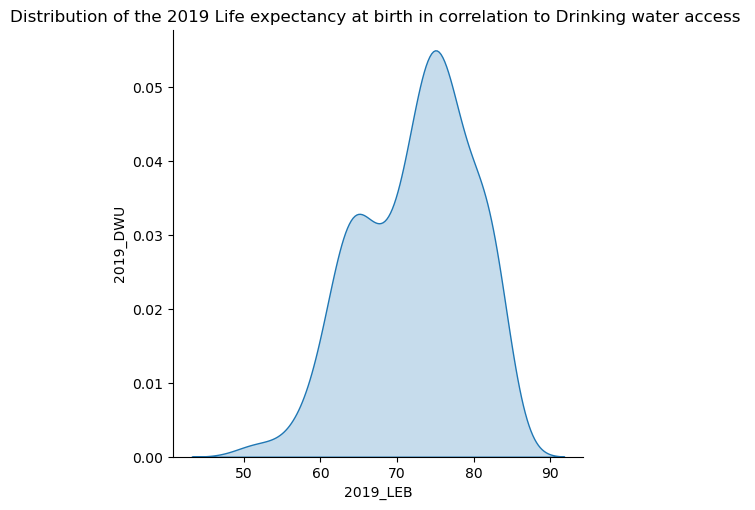

In [114]:
## Display the 1st dataset in a histogram plot 
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_final_birth,x='2019_LEB',kind='kde',fill=True) # smoothed histogram

# Set plot title and labels
plt.title('Distribution of the 2019 Life expectancy at birth in correlation to Drinking water access ')
plt.xlabel('2019_LEB')
plt.ylabel('2019_DWU')

# Display the plot
plt.show()

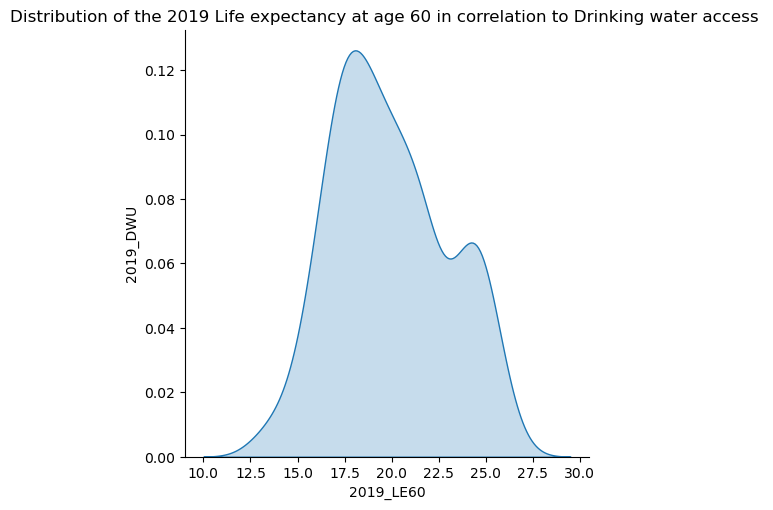

In [116]:
## Display the 2nd dataset in a histogram plot 
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_final_sixty,x='2019_LE60',kind='kde',fill=True) # smoothed histogram

# Set plot title and labels
plt.title('Distribution of the 2019 Life expectancy at age 60 in correlation to Drinking water access ')
plt.xlabel('2019_LE60')
plt.ylabel('2019_DWU')

# Display the plot
plt.show()

### Step 6 - Save the merged datasets in new CSV files

In [117]:
# Save the final DataFrames to new CSV files
#df_final_birth.to_csv('my_data/water_life_expect_birth.csv', index=False)
#df_final_sixty.to_csv('my_data/water_life_expect_sixty.csv', index=False)

## Check the notebook "life_expectancy_prediction" where we train the ML model using this data